# Classification d'images avec *tf.keras*

Dans ce projet, vous allez implémenter des réseaux neuronaux en utilisant **l'API de Keras**.

> Nous utiliserons l'implémentation de `Keras` contenu dans TensorFlow, `tf.keras`.
> Lien vers la documentation de [keras.io](https://keras.io/).
> Tout le code que nous écrirons dans ce notebook fonctionnera avec la librairie Keras. Nous n'utiliserons pas de lignes spécifiques à TensorFlow.
> Pour rappel : la seule différence entre la librairie Keras et le Keras inclus dans TensorFlow est la façon d'importer Keras :

>```python
> # keras.io code:
>from keras.layers import Dense
>output_layer = Dense(10)
>
> # corresponding tf.keras code:
>from tensorflow.keras.layers import Dense
>output_layer = Dense(10)
>
> # or:
>from tensorflow import keras
>output_layer = keras.layers.Dense(10)
>```


**Objectif : prédire les chiffres manuscrits du jeu de données MNIST**

- 1 Import & Vérification des versions des librairies
- 2 Chargement du jeu de données MNIST
- 3 Exploration des données
- 4 Pré-Processing
- 5 Construction du modèle
- 6 Compilation du modèle
- 7 Entrainement du réseau
- 8 Evaluation du modèle
- 9 Prédiction du modèle
- 10 Visualisation des prédictions


## ◢  1 Import & Vérification des versions des librairies

In [1]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
print("python", sys.version)

for module in tf.keras.Sequential(), keras, pd, np, mpl:
    module_name = getattr(module, '__name__', None)
    module_version = getattr(module, '__version__', None)

    print(f"Module Name: {module_name}, Module Version: {module_version}")


python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]

Module Name: None, Module Version: None
Module Name: keras.api._v2.keras, Module Version: None
Module Name: pandas, Module Version: 2.1.1
Module Name: numpy, Module Version: 1.26.0
Module Name: matplotlib, Module Version: 3.8.0


In [3]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

## ◢ 2 Chargement du jeu de données MNIST

Keras permet de charger de nombreux datasets avec `keras.datasets`.
Nous utiliserons le jeu de données MNIST *Modifier ou Mixed National Institute of Standards and Technology*, qui est une base de données de chiffres manuscrits.


La base MNIST est devenu un test standard. Elle regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST1.
Ces images sont en noir et blanc, normalisées centrées et de 28 pixels de côté.

Pour l’historique de la création de cette base, voir [Yann LeCun](http://yann.lecun.com/exdb/mnist/).

>Séparez le jeu de données d'entrainement en :
>- un jeu de validation contenant 5000 images
>- un jeu d'entrainement contenant 55000 images

In [4]:

# Charger le jeu de données MNIST
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Taille du jeu de validation
validation_size = 5000

# Séparer le jeu de données
X_valid, X_train = X_train_full[:validation_size], X_train_full[validation_size:]
y_valid, y_train = y_train_full[:validation_size], y_train_full[validation_size:]

## ◢  3 Exploration des données

Nous avons désormais 3 jeux de données :
- Le jeu de données d'entrainement qui contient 55000 images de tailles 28x28 pixels
- Le jeu de données de validation qui contient 5000 images de tailles 28x28 pixels
- Le jeu de données de test qui contient 10000 images de tailles 28x28 pixels

In [5]:
# Afficher la taille du X_train
print("Taille de X_train:", X_train.shape)


Taille de X_train: (55000, 28, 28)


In [6]:

# Afficher la taille du X_valid
print("Taille de X_valid:", X_valid.shape)


Taille de X_valid: (5000, 28, 28)


In [7]:

# Afficher la taille du X_test
print("Taille de X_test:", X_test.shape)

Taille de X_test: (10000, 28, 28)


Chaque pixel a une valeur comprise entre 0 et 255.

In [8]:
X_train[0][10:15]

array([[  0,   0, 226, 254, 208, 199, 199, 199, 199, 139,  61,  61,  61,
         61,  61, 128, 222, 254, 254, 189,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  38,  82,  13,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  34, 213, 254, 254, 115,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 106, 157, 254, 254, 243,  51,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

Nous pouvons afficher une image en utilisant la fonction de Matplotlib `imshow()`, avec la carte des couleurs `'binary'` :

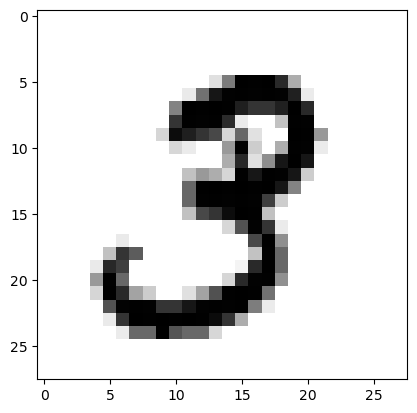

In [9]:
plt.imshow(X_train[1], cmap="binary")
plt.show()

Les labels sont des classes allant de 0 à 9

In [10]:
y_train[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

Regardons quelques images du jeu de données :

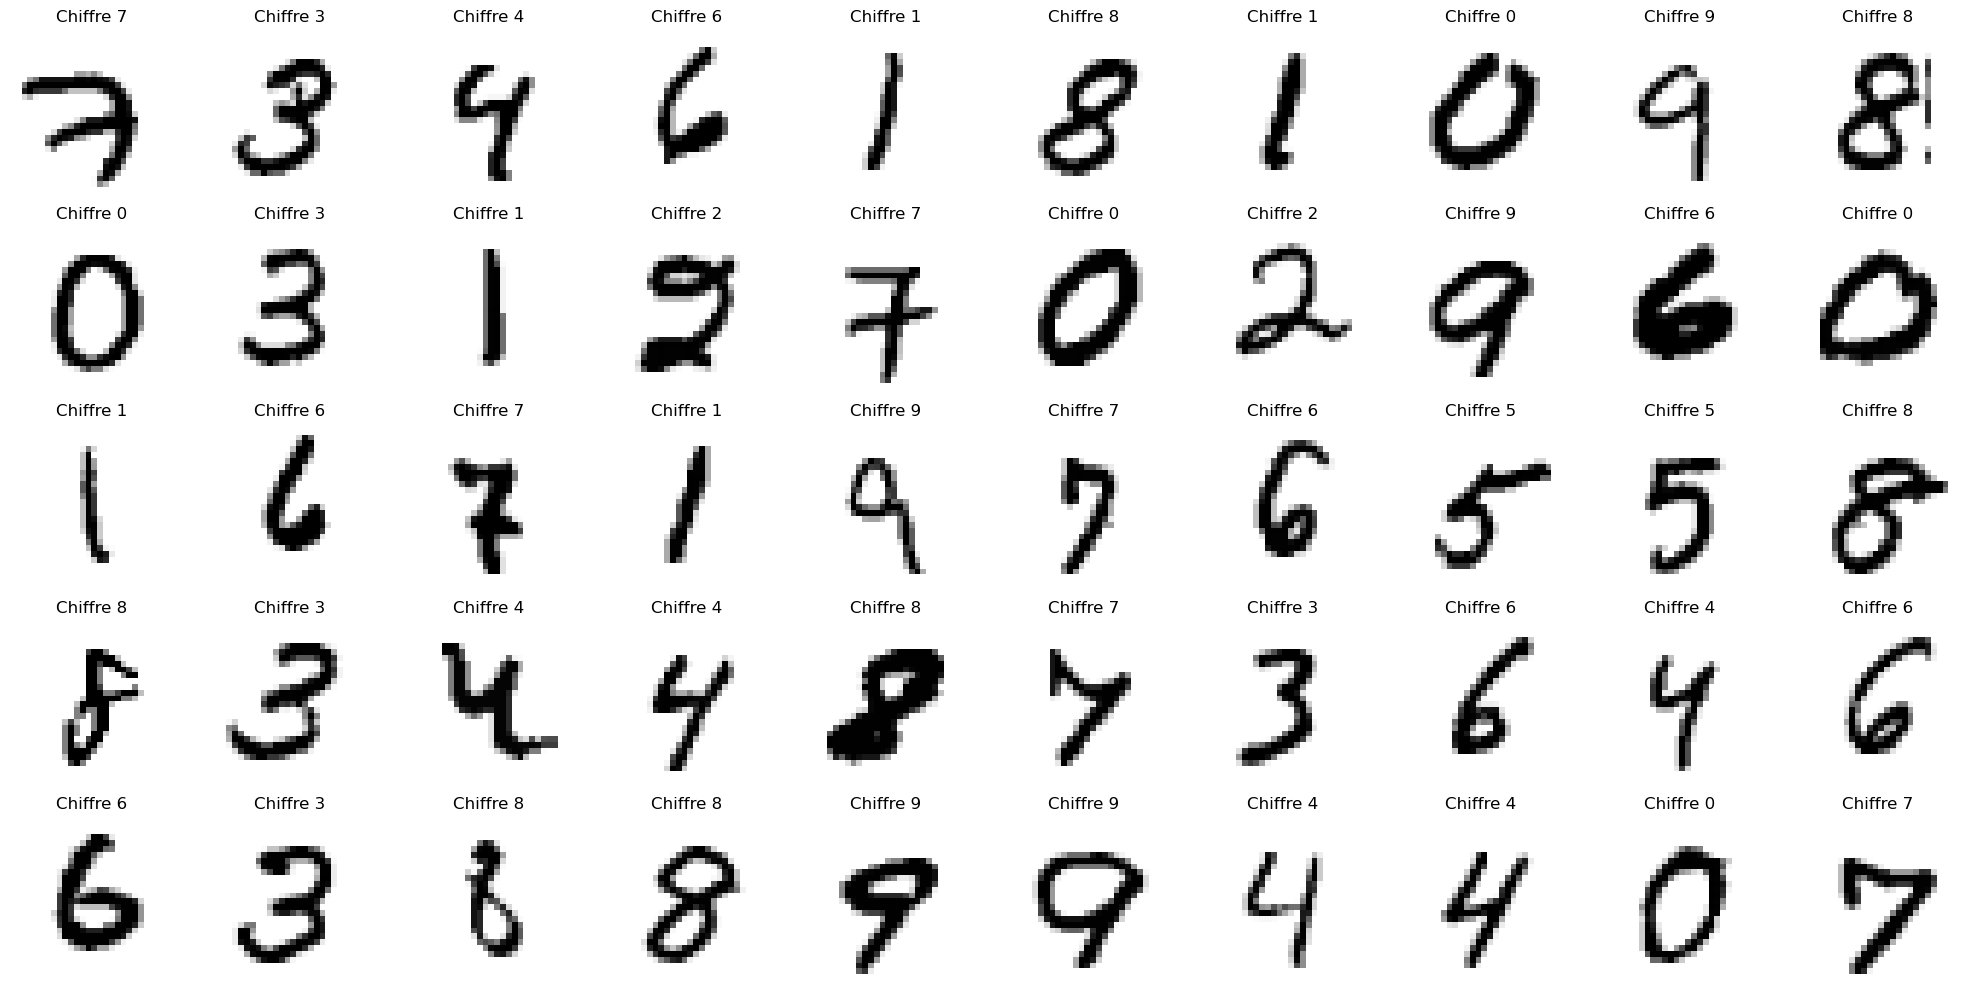

In [11]:

n_rows = 5
n_cols = 10

plt.figure(figsize=(n_cols*2, n_rows*2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")  #  X_train est notre  jeu de données
        plt.axis('off')
        plt.title('Chiffre ' + str(y_train[index]))

plt.tight_layout()
plt.show()


## ◢ 4 Pré-Processing
Les images étant dans l'échelle [grayscale](https://en.wikipedia.org/wiki/Grayscale), les valeurs varient de 0 à 255.

Afin de normaliser (centrer) les données, nous allons implémnter la fonction Min-Max scaling dans la fonction `normalize_grayscale()`. Après la mise à l'échelle, les valeurs des pixels des données d'entrée iront de 0.1 à 0.9.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$







<img class="tfo-display-only-on-site" src="images/Mean_Variance_Image.png" height="300"/>

In [12]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """

     # Déterminer les valeurs min et max de l'image_data
    Xmin = np.min(image_data)
    Xmax = np.max(image_data)

    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    normalized_data = a + (image_data - Xmin) * (b - a) / (Xmax - Xmin)

    return normalized_data


### VERIFIER VOTRE IMPLEMENTATION AVEC LES TESTS UNITAIRES CI-DESSOUS ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])


train_features = normalize_grayscale(X_train)
val_features = normalize_grayscale(X_valid)
test_features = normalize_grayscale(X_test)

print('Tests Passed!')

Tests Passed!


## ◢  5 Construction d'un modèle

Construction d'un modèle `Sequential` avec l'API `keras.models.Sequential`, sans aucun argument, et avec 3 couches en utilisant la méthode `add()` :
  * Une couche `Flatten` (`keras.layers.Flatten`) pour convertir chaque image de taille 28x28 image en un simple tableau de 784 pixels. Comme cette couche est la première de votre modèle, vous devez spécifier l'argument `input_shape`.
  * Une couche `Dense` (`keras.layers.Dense`) avec 50 neurones (également appelés units), et la fonction d'activation `"relu"`.
  * Pour finir une couche `Dense` avec 10 neurones (1 par classe), et avec la fonction d'activation `"softmax"` activation pour s'assurer que la somme de toutes les probabilités des classe estimées pour chaque image est égale à 1.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Initialiser le modèle
model = Sequential()

# Ajouter une couche Flatten avec input_shape spécifié
model.add(Flatten(input_shape=(28, 28)))

# Ajouter une couche Dense avec 50 neurones et fonction d'activation "relu"
model.add(Dense(50, activation='relu'))

# Ajouter la couche de sortie Dense avec 10 neurones (classes) et activation "softmax"
model.add(Dense(10, activation='softmax'))

*Vous* pouvez également utiliser une autre annotation.
Au lieu d'utiliser la méthode `add()`, vous pouvez lister les couches dans le constructeur.

In [14]:
# Construire le modèle en spécifiant les couches dans le constructeur
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Couche Flatten avec input_shape spécifié
    Dense(50, activation='relu'),   # Couche Dense avec 50 neurones et activation "relu"
    Dense(10, activation='softmax')  # Couche Dense de sortie avec 10 neurones et activation "softmax"
])

Utilisez l'attribut `layers` de model pour afficher la liste des couches

In [15]:
# Afficher la liste des couches du modèle
for layer in model.layers:
    print(layer.name, layer.trainable)

flatten_1 True
dense_2 True
dense_3 True


Appelez la méthode `summary()` sur le model pour XXX

In [16]:
# Afficher le résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ◢  6 Compilation du modèle

Après avoir créé le modèle, vous devez appeler la méthode `compile()`afin de spécifier la fonction de cout (`loss` function) et l'`optimizer` à utiliser.

Dans ce TP, nous utiliserons la fonction de cout `"sparse_categorical_crossentropy"`, et l'optimiseur suivant `keras.optimizers.SGD(learning_rate=0.01)`(stochastic gradient descent avec un learning rate à 0.01).

Vous pouvez également spécifier une liste de métriques additionelles qui pourront être mesurée lors de la phase d'apprentissage comme `metrics=["accuracy"]`.

**Note**: Dans la documenation de Keras, vous trouverez d'autres fontions de cout `keras.losses`, d'autres métriques `keras.metrics` et d'autres optimiseurs `keras.optimizer`.

In [17]:
from tensorflow.keras.optimizers import SGD

# Compilation du modèle
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## ◢  7 Entrainement du modèle

Votre modèle est désormais prêt à être entrainé. Appelez la méthode `fit()`, en passant les paramètres d'entrées (`train_features`) et les valeurs à prédire (`y_train`).

Définissez :
- le nombre d'epochs `epochs=5`
- les données de validation `validation_data=(val_features, y_valid)`

**Note**: La méthode `fit()` retourne un objet `History` qui contient les statistiques d'entrainement. N'oubliez pas de récupérer cet objet (`history = model.fit(...)`).

In [18]:
# Entraînement du modèle
history = model.fit(train_features, y_train, epochs=5, validation_data=(val_features, y_valid))


Epoch 1/5


1719/1719 [==============================] - 4s 2ms/step - loss: 0.8124 - accuracy: 0.7976 - val_loss: 0.4285 - val_accuracy: 0.8844
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3951 - accuracy: 0.8902 - val_loss: 0.3423 - val_accuracy: 0.9032
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3421 - accuracy: 0.9032 - val_loss: 0.3070 - val_accuracy: 0.9144
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.9109 - val_loss: 0.2885 - val_accuracy: 0.9196
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.9157 - val_loss: 0.2747 - val_accuracy: 0.9232


Regardons les valeurs de la fonction de cout et de l'accuracy sur les 2 jeux de données (train et validation)

In [34]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()




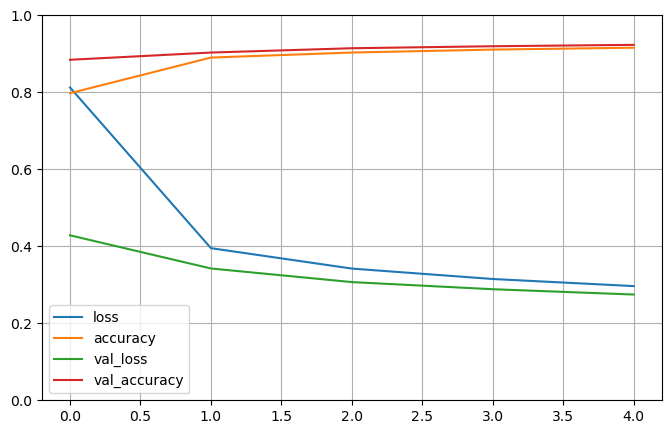

In [35]:


# Utilisez la fonction avec l'objet history retourné par fit()
plot_learning_curves(history)

Relancez `model.fit()` avec 3 epochs, que se passe-t-il ?

Epoch 1/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2315 - accuracy: 0.9313 - val_loss: 0.1349 - val_accuracy: 0.9636
Epoch 2/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2159 - accuracy: 0.9354 - val_loss: 0.1150 - val_accuracy: 0.9668
Epoch 3/3
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2013 - accuracy: 0.9387 - val_loss: 0.1099 - val_accuracy: 0.9682


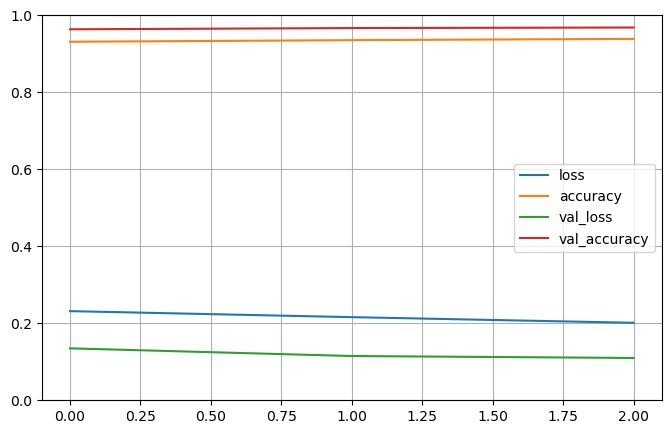

In [36]:
# Continuer l'entraînement avec 3 époques supplémentaires
history_additional_epochs = model.fit(train_features, y_train, epochs=3, validation_data=(val_features, y_valid))

# Plot des courbes d'apprentissage après les époques supplémentaires
plot_learning_curves(history_additional_epochs)

## ◢ 8 Evaluation du modèle

Appelez la méthode `evaluate()` sur le modèle précédement créé sur le jeu de données de test (`test_features` et `y_test`). Cette méthode va calculer la fonction de cout (ici cross-entropy) sur le jeu de test, ainsi que les métriques additionnelles (dans ce cas, l'accuracy).

Votre modèle doit atteindre une accuracy de plus de 90% sur le jeu de test.

In [22]:
# Évaluation du modèle sur le jeu de test
test_loss, test_accuracy = model.evaluate(test_features, y_test)

# Afficher les résultats
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.2452 - accuracy: 0.9304
Test Loss: 0.2452
Test Accuracy: 93.04%


## ◢ 9 Prédiction

Appelez la méthode `predict()` sur le modèle afin d'estimer la probabilité de chaque classe pour chaque instance (pour une meilleure lisibilité, utilisez la méthode `round()` sur les probabilités générées):

In [23]:
# Prédiction sur le jeu de test
predictions_probabilities = model.predict(test_features)

# Arrondir les probabilités pour une meilleure lisibilité
rounded_predictions = np.round(predictions_probabilities)

# Afficher les résultats
for i in range(10):  # Afficher les 10 premières prédictions
    print(f"Instance {i + 1}:")
    print(f"Probabilités: {predictions_probabilities[i]}")
    print(f"Prédictions arrondies: {rounded_predictions[i]}")
    print(f"Classe prédite: {np.argmax(predictions_probabilities[i])}\n")

313/313 [==============================] - 1s 2ms/step
Instance 1:
Probabilités: [1.05416366e-04 4.88518097e-08 9.84813814e-05 1.69035257e-03
 3.03879392e-06 4.12845620e-05 5.03939752e-08 9.97089982e-01
 2.04718108e-05 9.50781745e-04]
Prédictions arrondies: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Classe prédite: 7

Instance 2:
Probabilités: [9.6095270e-03 5.4067681e-05 9.3861300e-01 8.7900227e-03 1.4156408e-08
 1.3785432e-02 2.5621479e-02 2.1703674e-09 3.5263570e-03 9.1281507e-08]
Prédictions arrondies: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Classe prédite: 2

Instance 3:
Probabilités: [9.8148339e-06 9.6628213e-01 1.2505399e-02 7.3281210e-03 1.3987796e-04
 2.1234944e-03 1.1394676e-03 6.7834817e-03 3.2473137e-03 4.4093540e-04]
Prédictions arrondies: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Classe prédite: 1

Instance 4:
Probabilités: [9.9981445e-01 2.7647670e-10 5.9690712e-05 8.8773777e-06 1.3796817e-08
 4.2884552e-05 5.4936507e-05 3.2223807e-06 1.1188003e-05 4.7174972e-06]
Prédictions arrondies: [1. 0. 0. 0. 

A partir des probabilités des différentes valeurs, déduisons-en la valeur prédite (celle qui a le % maximum => utilisez la fonction `argmax`)

In [24]:
# Utiliser argmax pour obtenir la classe prédite
y_pred = np.argmax(predictions_probabilities, axis=1)

# Afficher les premières valeurs prédites
print("Valeurs prédites :", y_pred[:10])

Valeurs prédites : [7 2 1 0 4 1 4 9 6 9]


## ◢ 10 Visualisation des prédictions

Méthodes utilitaires pour afficher une image et un bar chart représentant la probabilité des prédictions pour chaque chiffre de 0 à 9 (les prédictions en bleu sont les prédictions correctes et en rouge celles incorrectes)

In [25]:
def plot_prediction_image(predictions_array, true_label, img):
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Chiffre prédit {predicted_label} {np.max(predictions_array) * 100:.2f}% ({true_label})", color=color)

def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


Affichage de l'image à prédire et de la probabilité des prédictions pour chaque chiffre de 0 à 9 pour la première image

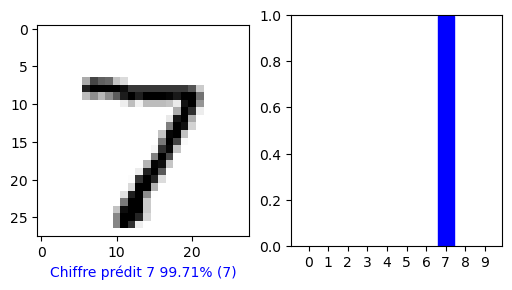

In [26]:
# Index de l'image à prédire
image_index = 0

# Affichage de l'image et du bar chart
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_prediction_image(predictions_probabilities[image_index], y_test[image_index], test_features[image_index])
plt.subplot(1, 2, 2)
plot_prediction_bar_chart(predictions_probabilities[image_index], y_test[image_index], test_features[image_index])

plt.show()


### 10-1 Affichons les 40 premiers chiffres et visualisons les prédictions


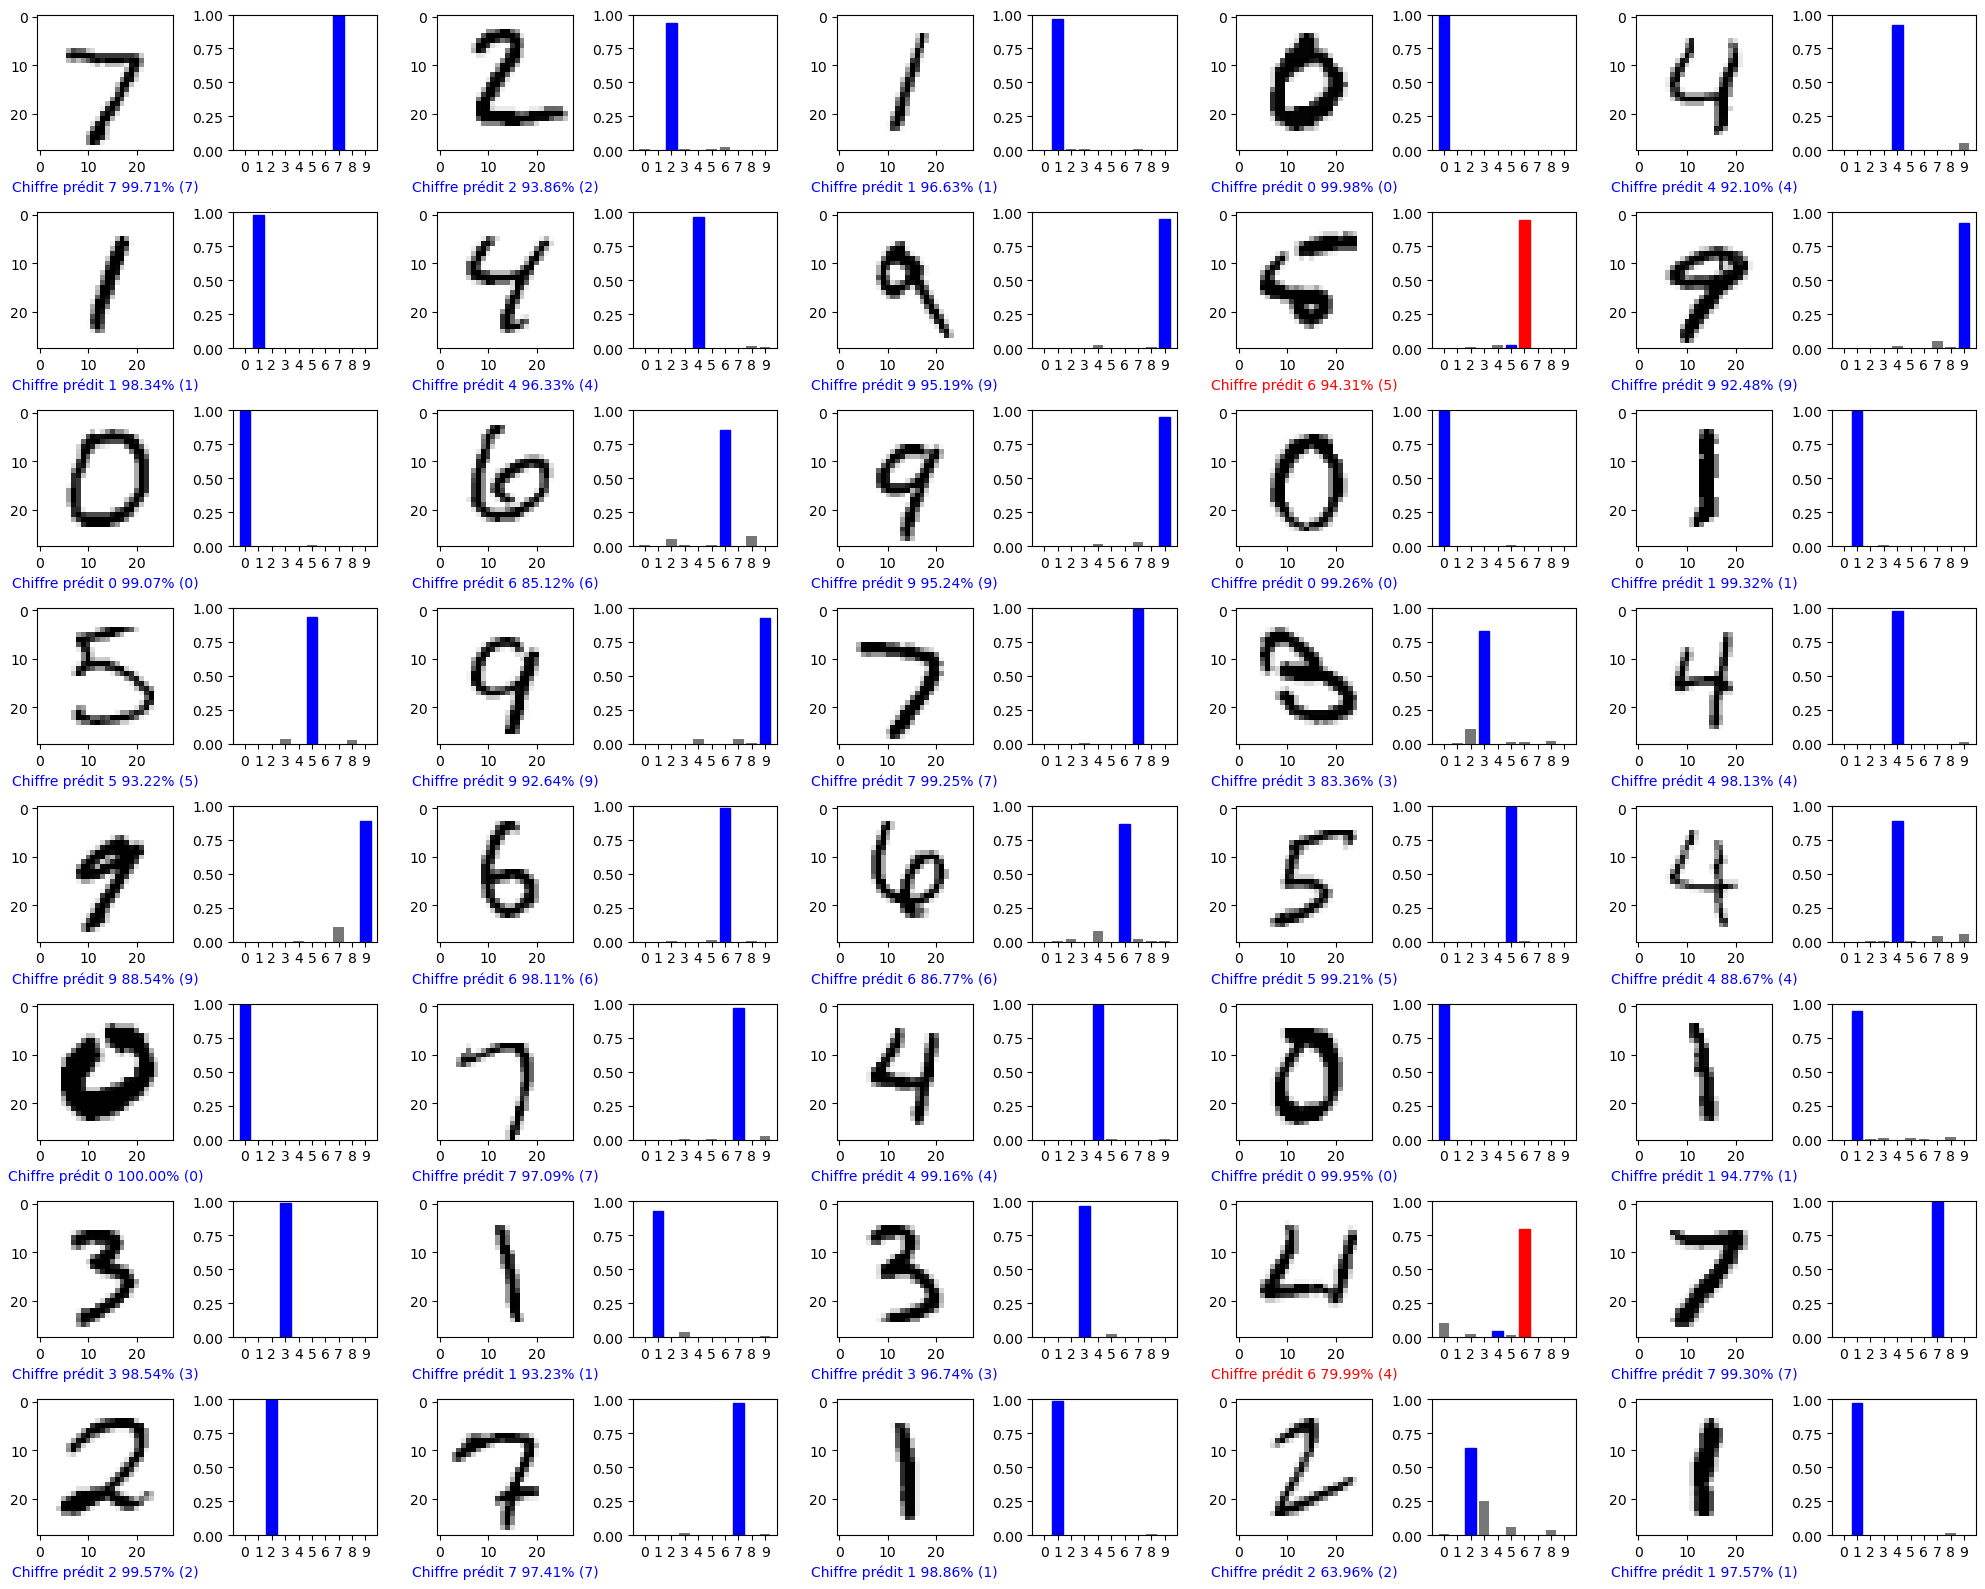

In [27]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(predictions_probabilities[index], y_test[index], test_features[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(predictions_probabilities[index], y_test[index], test_features[index])
plt.tight_layout()
plt.show()



### 10-2 Focus sur les images mal prédites

In [28]:
y_proba_false = predictions_probabilities[y_pred != y_test]
y_test_false = y_test[y_pred != y_test]
X_test_false = X_test[y_pred != y_test]

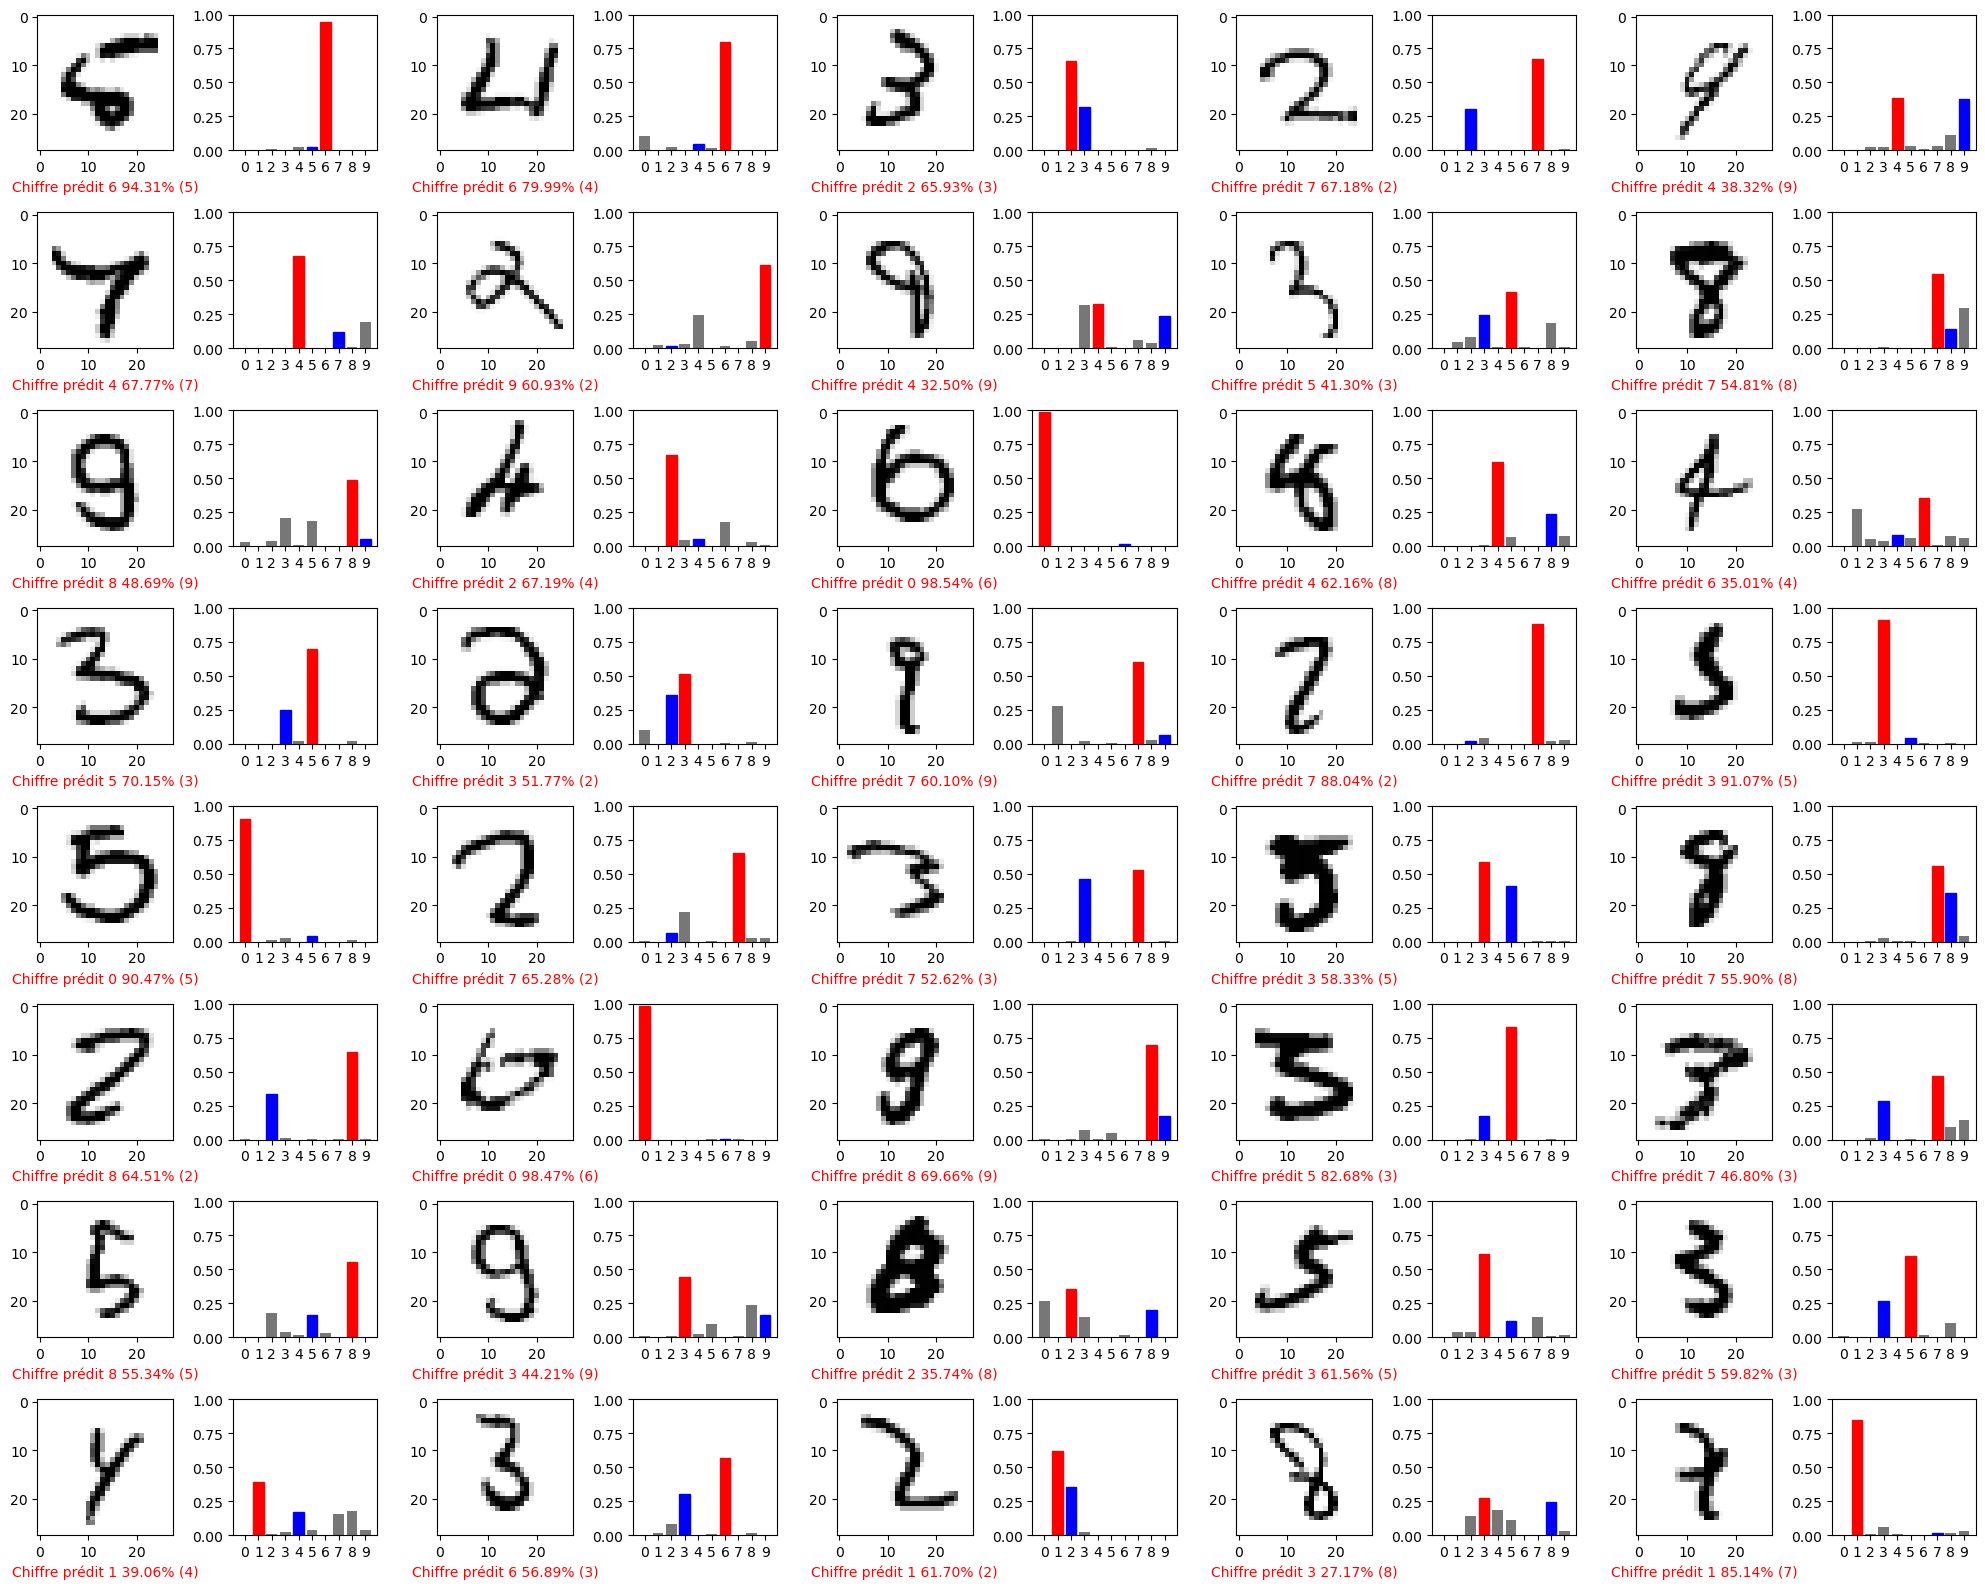

In [29]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba_false[index], y_test_false[index], X_test_false[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba_false[index], y_test_false[index], X_test_false[index])
plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Charger les données (assurez-vous d'avoir déjà les données chargées)
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normaliser les données
X_train, X_test = X_train_full / 255.0, X_test / 255.0

# Créer le modèle
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Ajout d'une couche de dropout pour la régularisation
    layers.Dense(10, activation='softmax')
])

# Compiler le modèle avec un taux d'apprentissage plus petit
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Augmentation des données
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train.reshape((-1, 28, 28, 1)))

# Entraîner le modèle avec des données augmentées
history = model.fit(datagen.flow(X_train.reshape((-1, 28, 28, 1)), y_train_full, batch_size=32),
                    epochs=15,
                    validation_data=(X_test.reshape((-1, 28, 28, 1)), y_test))

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test.reshape((-1, 28, 28, 1)), y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




Epoch 1/15


1875/1875 [==============================] - 21s 11ms/step - loss: 0.8740 - accuracy: 0.7236 - val_loss: 0.2189 - val_accuracy: 0.9452
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5317 - accuracy: 0.8368 - val_loss: 0.1556 - val_accuracy: 0.9554
Epoch 3/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4640 - accuracy: 0.8583 - val_loss: 0.1304 - val_accuracy: 0.9608
Epoch 4/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4278 - accuracy: 0.8701 - val_loss: 0.1300 - val_accuracy: 0.9606
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4108 - accuracy: 0.8745 - val_loss: 0.1184 - val_accuracy: 0.9657
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3928 - accuracy: 0.8805 - val_loss: 0.1143 - val_accuracy: 0.9656
Epoch 7/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3859 - accuracy: 0.8830 - val_loss: 0.10

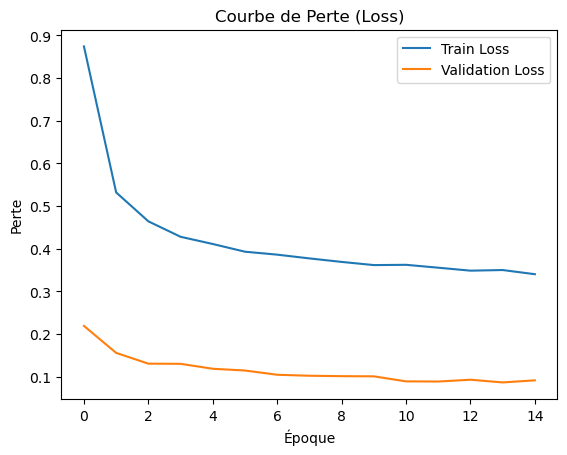

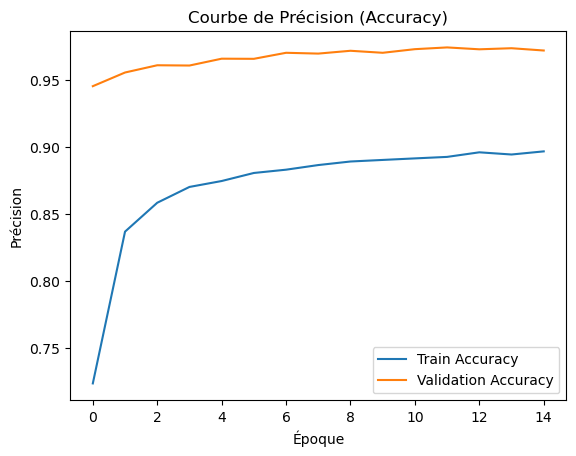

In [2]:
import matplotlib.pyplot as plt

# Tracer les courbes d'apprentissage
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte (Loss)')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Tracer la courbe de précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de Précision (Accuracy)')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


313/313 [==============================] - 1s 2ms/step


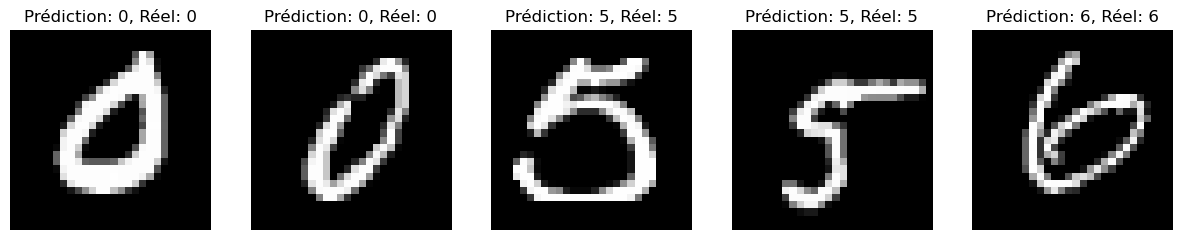

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Prédire les classes pour l'ensemble de test
y_pred_probs = model.predict(X_test.reshape((-1, 28, 28, 1)))
y_pred = np.argmax(y_pred_probs, axis=1)

# Sélectionner quelques images au hasard dans l'ensemble de test
indices = np.random.choice(len(X_test), 5)

# Afficher les images avec les prédictions
plt.figure(figsize=(15, 5))
for i, index in enumerate(indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Prédiction: {y_pred[index]}, Réel: {y_test[index]}")
    plt.axis('off')
plt.show()
